# 0 - Progetto DataMining Fifa 20
 *Team:* 
           
            Natascia De Vico   
            Mattia Giglio
            Duilio Palmieri
            Giugeppe Verardi

**Kaggle Fifa 20** (https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset)

Dataset:

FIFA è una serie molto popolare di videogiochi di calcio, sviluppata e pubblicata da Arti Elettroniche (EA).

È probabilmente una delle serie di maggior successo nel settore dei videogiochi con vendita di milioni di copie in tutto il mondo.

Il gioco ha diverse modalità: ad esempio, partite amichevoli, tornei, partite online.
Tra queste modalità c'è anche la Fifa Ultimate Team Mode, dove l'utente può simulare l'intera carriera di un allenatore e dirigente calcistico di una squadra.

Secondo questa modalità di gioco, il giocatore umano, in quanto allenatore/direttore generale della squadra, ci si aspetta che prenda numerose decisioni, fondamentali per lo sviluppo e il progresso del suo team.
Una delle responsabilità chiave del direttore generale è decidere quali giocatori acquistare o vendere.

In questo contesto, sarebbe auspicabile disporre di un sistema guidato dai dati che aiuti il ​​direttore generale a prendere queste decisioni. Chiaramente, l'obiettivo di tale sistema sarebbe stimare correttamente il valore reale di mercato di ogni giocatore, in modo che il direttore generale della squadra possa prendere una decisione informata.

# 1 - Formally define the problem (DONE)
FIFA è un videogioco molto famoso. Fornisce dei parametri per i calciatori che seppur 'ideati' per il gioco sono molto vicini alla realtà da cui prendono spunto. Adopereremo pertanto i parametri disponibili per fornire un modello predittivo del valore di mercato di ogni giocatore come strumento di supporto alla decisione del manager durante la campagna acquisti sul gioco FIFA20.

Quando parliamo del valore di mercato di un calciatore, ci riferiamo a una stima in termini monetari del valore del giocatore nel mondo del calcio. Questo importo è solitamente quello che il club del giocatore è disposto ad accettare per vendere o trasferire il contratto del giocatore a un altro club.
La capacità di prevedere il valore di mercato di un giocatore di calcio può fornire un vantaggio commerciale al manager incaricato degli acquisti/vendite.

# 2 - Overview - Piano di azione (DONE)
Siamo di fronte ad un tipico caso di "supervised learning" poichè la nostra label è il valore del calciatore (Value) da predire. Per farlo, dopo aver acquisito il dataset, andremo a trasformare la stringa del Value nel suo equivalente valore numerico in euro.
Si tratta inoltre di un tipico problema di regressione, poichè vogliamo predire un valore numerico.
In particolare si tratta di un problema di regressione multivariato poichè le features che contribuiscono al valore della label individuata sono tante.

Operativamente, dopo aver trasformato alcune variabili da formato stringa nell'equivalente valore numerico nel Sistema Internazionale di Misura provvederemo ad acquisire maggiore conoscenza nel dominio del dataset per meglio comprendere il problema. Commetteremo, volutamente, un errore di 'data snooping' ovvero rimanderemo poco più in la la divisione del dataset in train e test.

# 3 - Acquisire i dati (DONE)

In [228]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import sqrt
import scipy.stats
import sys

import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [229]:
#fonte dati fifa20 copiato su github
giocatoriFifa20='https://raw.githubusercontent.com/acalio/mds/main/Assignments/Fifa/data.csv'
#'https://raw.githubusercontent.com/natydevico/Dataset/master/fifa20/data.csv'
 
dfGiocatoriFifa20 = pd.read_csv(giocatoriFifa20)

# 4 - Discover and visualize the data to gain insights (DONE)

In [230]:
print(dfGiocatoriFifa20.shape)

(18207, 89)


In [231]:
dfGiocatoriFifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Prendiamo nota del tipo di dato per Height, Weight, Value e Wage. Ci saremmo aspettati dati di tipo numerico ma in questo dataset sono stati rappresentati con unità di misura specifica nel testo. Saranno sicuramente oggetto di trasformazione nelle fasi successive. Vediamo inoltre la presenza di valori nulli nel dataset.

In [232]:
dfGiocatoriFifa20.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [233]:

dfGiocatoriFifa20.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Per procedere alla visualizzazione del dato ed acquisirne maggiore conoscenza preferiamo procedere ad alcune trasformazioni che ci aiuteranno per una immediata conoscenza del dominio del dataset.

Trasformiamo l'altezza, espressa in pollici (string), in cm (numerico):

In [234]:
Height_cm = []
for i in list(dfGiocatoriFifa20['Height'].values):
    try:
        Height_cm.append(round((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54,0))
    except(ValueError):
        Height_cm.append(np.nan)
        
dfGiocatoriFifa20['Height_cm'] = Height_cm

Analogamente procediamo per il peso dei giocatori, da libre (string) trasformiamo in kg (numerico):

In [235]:
dfGiocatoriFifa20['Weight_kg'] = round(dfGiocatoriFifa20['Weight'].str[:3].astype(float)/2.20462,0)

In [236]:
#adding new column BMI to check the health and fitness of players
dfGiocatoriFifa20["BMI"] = dfGiocatoriFifa20['Weight_kg'] / (dfGiocatoriFifa20['Height_cm'] / 100) ** 2
dfGiocatoriFifa20.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Height_cm,Weight_kg,BMI
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,181.179911,75.289003,22.909336
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,6.691885,7.075511,1.409429
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,155.000000,50.000000,16.920033
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,175.000000,70.000000,22.068809
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,180.000000,75.000000,22.857143
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,185.000000,80.000000,23.766410
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,

Eseguiamo un grafico della distribuzione delle altezze dei giocatori.

Mean Height_cm:  181.179910788039
Standard Deviation in Height_cm:  6.691884731590987


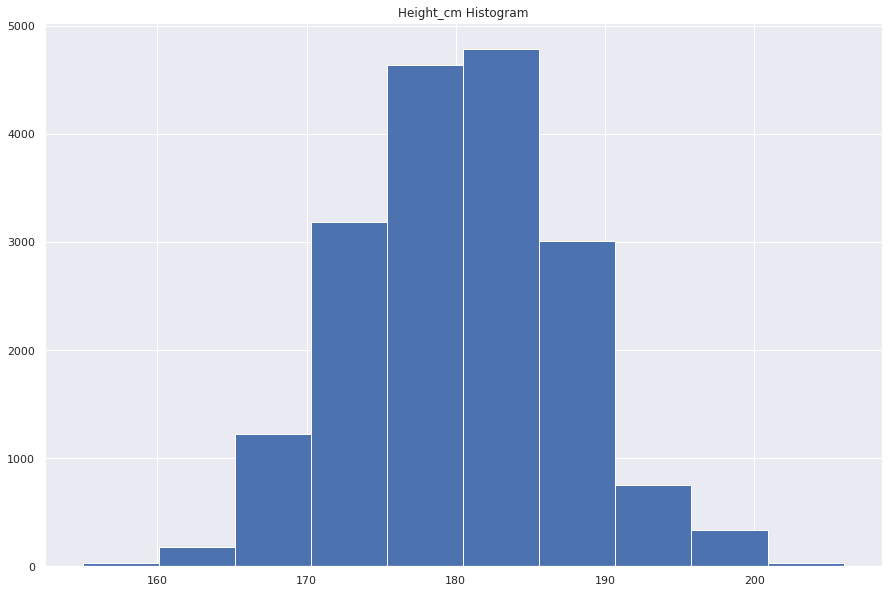

In [237]:
import seaborn as sns 
import matplotlib.pyplot as plt
def get_statistics(numeric_column_name):
    print("Mean {}: ".format(numeric_column_name),   dfGiocatoriFifa20[numeric_column_name].mean())
    print("Standard Deviation in {}: ".format(numeric_column_name), dfGiocatoriFifa20[numeric_column_name].std())
    sns.set()
    plt.title("{} Histogram".format(numeric_column_name))
    dfGiocatoriFifa20[numeric_column_name].hist(bins = 10)
    
get_statistics('Height_cm')

In [238]:
dfGiocatoriFifa20.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Definiamo una funzione che riesce a trasformare i valori espressi per i campi Wage e Value (campi stringa) nei valori numerici equivalenti

In [239]:
def parse_money(s):
    if s.startswith('€'):
        s = s[1:]
    multiplier = None
    if s.endswith('M'):
        s = s[:-1]
        multiplier = 1e6
    elif s.endswith('B'):
        s = s[:-1]
        multiplier = 1e9
    elif s.endswith('K'):
        s = s[:-1]
        multiplier = 1e3
    f = float(s)
    if multiplier:
        f = f * multiplier
    return f

Sostituiamo nello stesso campo, sia per Value che per Wage, con il valore numerico richiamando la funzione definita:

In [240]:
dfGiocatoriFifa20['Value'] = dfGiocatoriFifa20['Value'].apply(parse_money)
dfGiocatoriFifa20['Wage'] = dfGiocatoriFifa20['Wage'].apply(parse_money)

## Conta giocatori per altezza

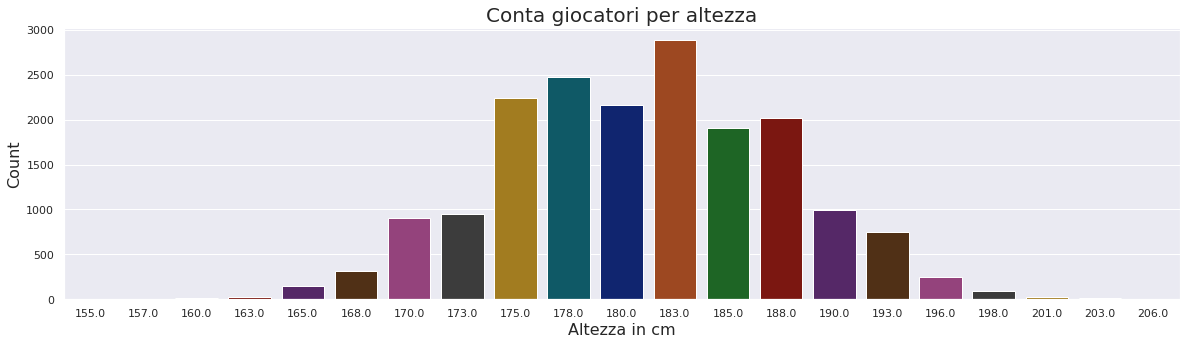

In [241]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(x = 'Height_cm', data = dfGiocatoriFifa20, palette = 'dark')
ax.set_title(label = 'Conta giocatori per altezza', fontsize = 20)
ax.set_xlabel(xlabel = 'Altezza in cm', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

## Migliori giocatori basato su Overall scores

In [242]:
dfGiocatoriFifa20.iloc[dfGiocatoriFifa20.groupby(dfGiocatoriFifa20['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality','Overall']]

,Position,Name,Age,Club,Nationality,Overall
17,CAM,A. Griezmann,27,Atlético Madrid,France,89
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
20,CDM,Sergio Busquets,29,FC Barcelona,Spain,89
271,CF,Luis Alberto,25,Lazio,Spain,82
67,CM,Thiago,27,FC Bayern München,Spain,86
3,GK,De Gea,27,Manchester United,Spain,91
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia,88
35,LB,Marcelo,30,Real Madrid,Brazil,88
24,LCB,G. Chiellini,33,Juventus,Italy,89
11,LCM,T. Kroos,28,Real Madrid,Germany,90


## Nazioni rappresentate

In [243]:
dfGiocatoriFifa20['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

## Prime 30 Nazioni maggiormente rappresentate

Numero di giocatori per nazione in ordine descrescente.

In [244]:
top_country = dfGiocatoriFifa20['Nationality'].value_counts().head(30)

top_country

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Korea Republic          335
Portugal                322
Turkey                  303
Austria                 298
Scotland                286
Belgium                 260
Australia               236
Switzerland             220
Uruguay                 149
Senegal                 130
Name: Nationality, dtype: int64

Grafico delle prime 30 nazioni con maggior numero di giocatori

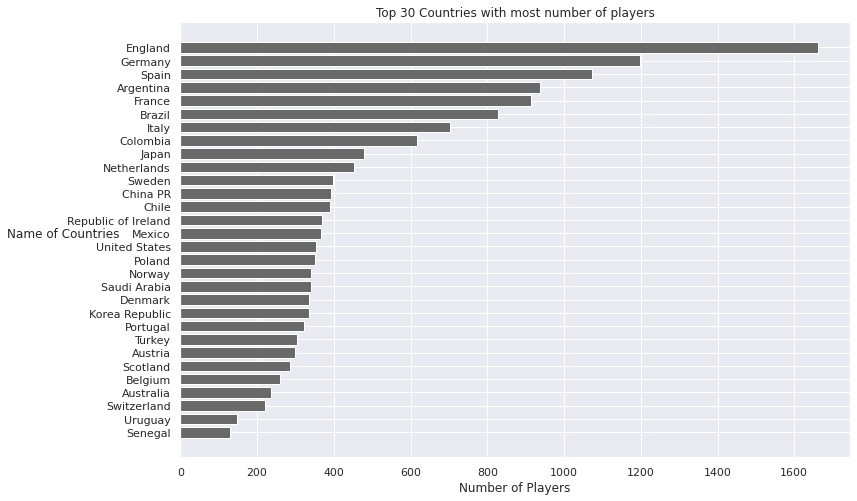

In [245]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_country.values
y = top_country.index
ax.barh(y, x, align='center', color='dimgray')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 30 Countries with most number of players')
plt.show()

## Punteggio complessivo per Nazione

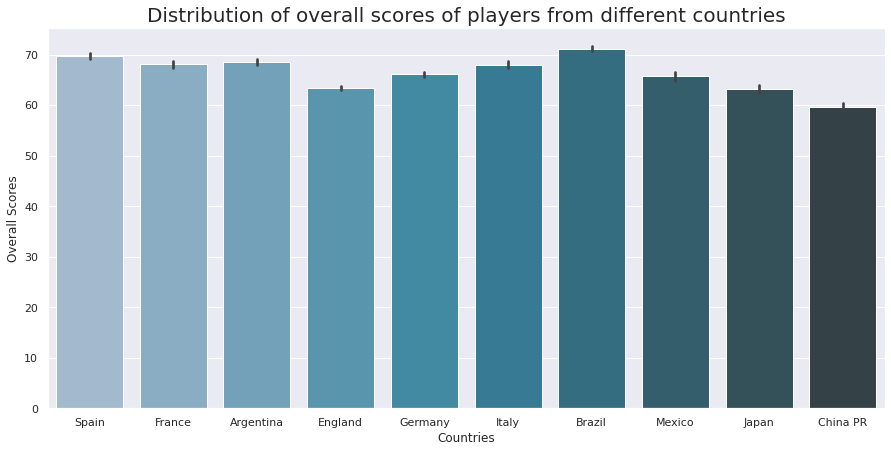

In [246]:
countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia', 'Japan', 'Mexico', 'China PR')
data_country= dfGiocatoriFifa20.loc[dfGiocatoriFifa20['Nationality'].isin(countries) & dfGiocatoriFifa20['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_country['Nationality'], y = data_country['Overall'], palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 12)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

## Top 20 Clubs by Total Player Value(Euro) of Fifa 20

In [247]:
import plotly.graph_objects as go

TopClubsInVal = dfGiocatoriFifa20[['Club', 'Value']]
TopClubsInVal = TopClubsInVal.set_index(n for n in range(TopClubsInVal.shape[0]))
TopClubsInVal = pd.DataFrame(TopClubsInVal.groupby('Club')['Value'].sum()).sort_values('Value', ascending = False).head(20)

fig = go.Figure(
        data = [go.Bar(y = TopClubsInVal['Value'],
                       x = TopClubsInVal.index)],
        layout_title_text = "Top 20 Clubs by Total Player Value(Euro) of Fifa 20"
        
)
fig.update_traces(marker_color='green')

fig.show() 

## Top 30 Most Valued Players (Euro)

In [248]:
most_valued = dfGiocatoriFifa20[['Name','Value', 'Club', 'Nationality']]
most_valued = most_valued.set_index(n for n in range(most_valued.shape[0]))
most_valued = most_valued.sort_values('Value', ascending = False).head(30)

fig = go.Figure(
        data = [go.Bar(y = most_valued['Value'],
                       x = most_valued['Name'])],
                       
        
        layout_title_text = 'Highest Valued Players of Fifa 20'
)
fig.show()

## Most Preferred Foot of the Players

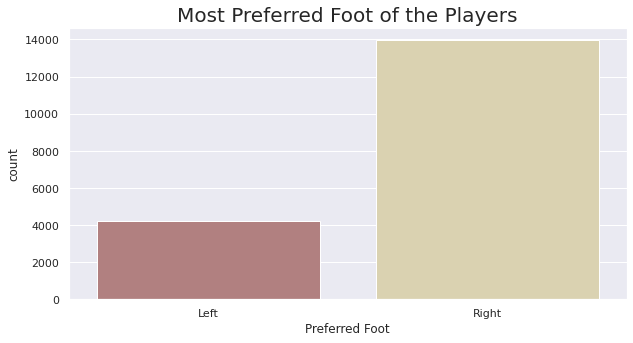

In [249]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(x=dfGiocatoriFifa20['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

## Migliori portieri di Fifa 20

In [250]:
GK = dfGiocatoriFifa20[dfGiocatoriFifa20['Position'] == 'GK']
GK = GK[['Name','Club', 'Nationality', 'Overall', 'Potential']]

GK = GK.sort_values('Overall', ascending = False).head(20)

fig = go.Figure(
        data = [go.Bar(y = GK['Overall'],
                       x = GK['Name'])],
        layout_title_text = "Migliori portieri di Fifa 20"
)
fig.update_traces(marker_color='goldenrod')
fig.show()

Age e Potential sono correlate negativamente. Ovviamente i giocatori giovani hanno maggiore potenziale.

## Word Cloud Nationality

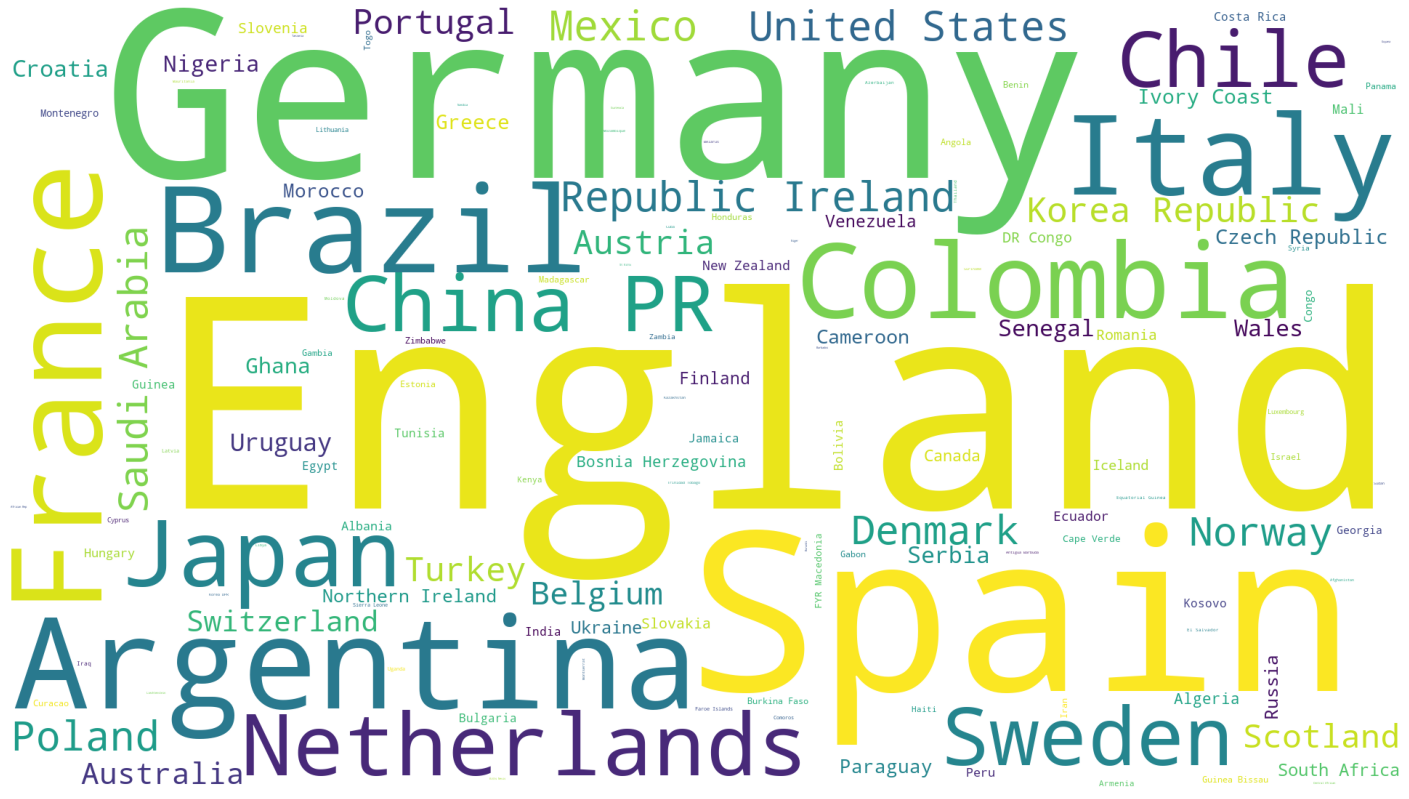

In [251]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dfGiocatoriFifa20.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 5 - Preprocessing (DONE)

## Features selection

Selezioniamo le variabili che sono di interesse per la nostra analisi nella determinazione del Valore dei giocatori.

Per eseguire questa selezione le tecniche sono tante: analisi correlazione, PCA, etc.
Per ora eseguiamo una selezione ragionata con l'aiuto delle correlazioni più importanti ma cercando di limitarle in numero; ritorneremo su questo passaggio successivamente per migliorarla ulteriormente qualora gli indicatori di bontà del modello non siano buoni.

In [252]:
df1 = dfGiocatoriFifa20
#.drop('Unnamed: 0,Name,Photo,Nationality,Flag,Club,Club Logo,Jersey Number,Joined,Real Face,Loaned From,Release Clause'.split(','), axis=1)
#df1.head()

corr_matrix = df1.corr()
corr_matrix["Value"].sort_values(ascending=False)

Value                       1.000000
Wage                        0.858442
International Reputation    0.653176
Overall                     0.627085
Potential                   0.576218
Reactions                   0.540552
Composure                   0.450352
Special                     0.377738
Vision                      0.357639
ShortPassing                0.327623
Skill Moves                 0.315651
BallControl                 0.308818
LongPassing                 0.302175
Volleys                     0.288243
Curve                       0.287235
ShotPower                   0.281360
LongShots                   0.279730
Dribbling                   0.272004
FKAccuracy                  0.265773
Positioning                 0.259391
Finishing                   0.256665
Crossing                    0.249785
Penalties                   0.239033
Stamina                     0.210721
Agility                     0.194259
Aggression                  0.184639
HeadingAccuracy             0.184437
S

In [253]:
df1[['Work Rate1', 'Work Rate2']] = df1['Work Rate'].str.split('/', expand=True)
df1 = df1.drop('Work Rate', axis=1)
df1[['Work Rate1', 'Work Rate2']].head()

,Work Rate1,Work Rate2
0,Medium,Medium
1,High,Low
2,High,Medium
3,Medium,Medium
4,High,High


Selezioniamo le prime 6 variabili più importanti per la correlazione e ne aggiungiamo alcune di interesse. Ad esempio la variabile BMI meglio è correlata rispetto alle due variabili originali Altezza e Peso del calciatore

In [254]:
df1 = dfGiocatoriFifa20[['Age','BMI','Overall','Potential',
          'Value','Wage','Position','Preferred Foot','International Reputation',
          'Work Rate1','Work Rate2','Composure','Reactions']]
print(df1.isnull().sum())
#df1

Age                          0
BMI                         48
Overall                      0
Potential                    0
Value                        0
Wage                         0
Position                    60
Preferred Foot              48
International Reputation    48
Work Rate1                  48
Work Rate2                  48
Composure                   48
Reactions                   48
dtype: int64


## Analisi correlazioni

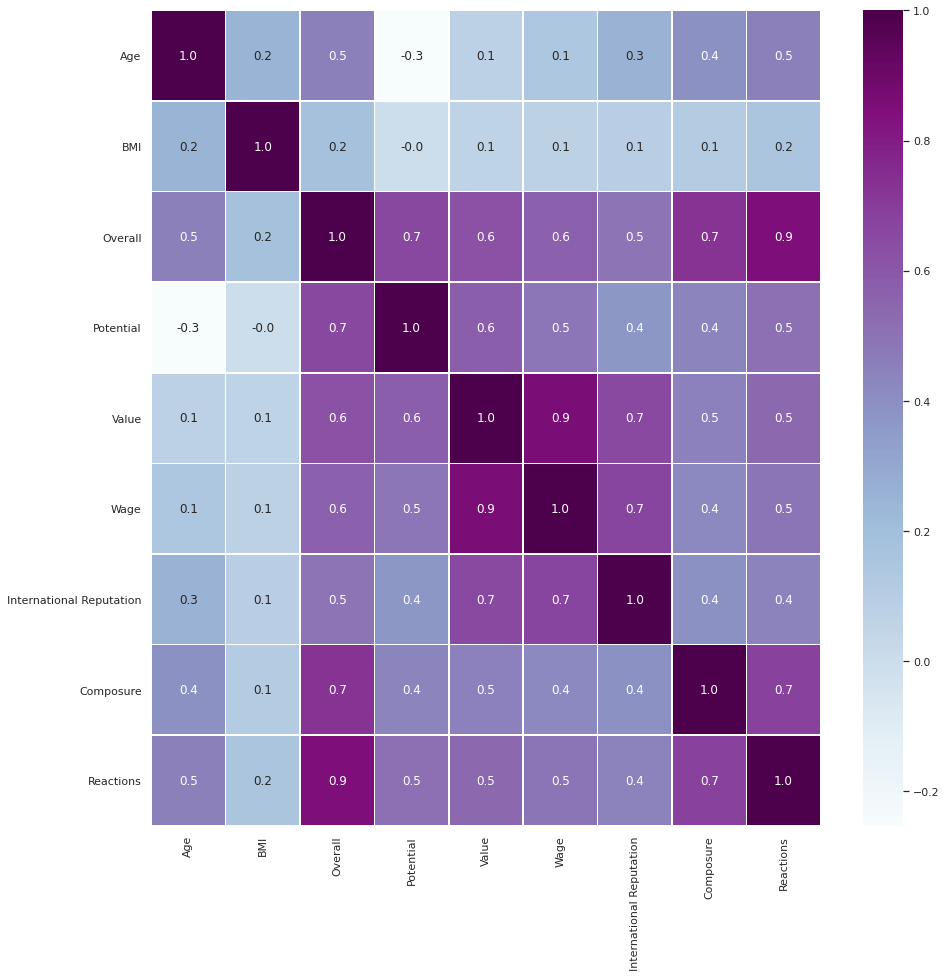

In [255]:
#Correlation map
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(),annot = True,linewidths=.5,fmt = '.1f',ax=ax, cmap="BuPu")
plt.show()

Siamo interessati alla variabile target Value. La matrice di correlazione mette in evidenza l'influenza sulla variabile target di alcuni campi, come atteso, ovvero Overall, Potential ed International Reputation. Consideriamo l'alta correlazione tra Value e Wage ovvia, poichè un calciatore avrà sicuramente un salario commisurato al suo valore.

Dividiamo il dataset selezionato in train e test. Lo facciamo in questo momento pur essendo consapevoli di un possibile effetto di 'data snooping'. Avremmo dovuto farlo ben prima ma volevamo acquisire maggiori competenze sul dominio dei dati osservandolo nella sua interezza:

In [256]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(df1))

Length of training data: 14565
Length of testing data: 3642
Length of total data: 18207


Dividiamo quindi le Xs (features) dalle ys (variabile target Value):

In [257]:
player = train_set.drop("Value", axis=1) # drop labels for training set
player_labels = train_set["Value"].copy()

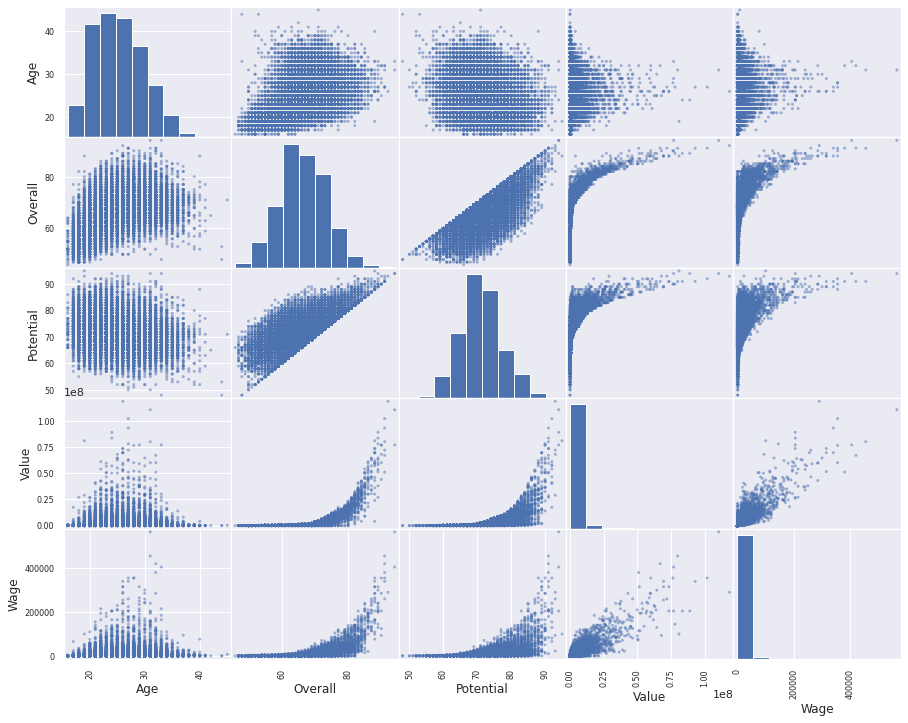

In [258]:
from pandas.plotting import scatter_matrix
attributes = ['Age', 'Overall', 'Potential', 'Value', 'Wage']
scatter_matrix(df1[attributes], figsize=(15,12))
plt.show()

Correlazioni forti tendono ad essere lineari. Gli attributi più promettenti per predire il Value di un giocatore sono Overall e Potential. La variabile Age è poco influente.

## Missing Data 

In [259]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14565 entries, 17472 to 15795
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14565 non-null  int64  
 1   BMI                       14531 non-null  float64
 2   Overall                   14565 non-null  int64  
 3   Potential                 14565 non-null  int64  
 4   Wage                      14565 non-null  float64
 5   Position                  14520 non-null  object 
 6   Preferred Foot            14531 non-null  object 
 7   International Reputation  14531 non-null  float64
 8   Work Rate1                14531 non-null  object 
 9   Work Rate2                14531 non-null  object 
 10  Composure                 14531 non-null  float64
 11  Reactions                 14531 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.4+ MB


Visualizziamo diversamente i valori nulli presenti. Ci occuperemo di gestirli all'interno delle pipeline che andremo a disegnare a breve.

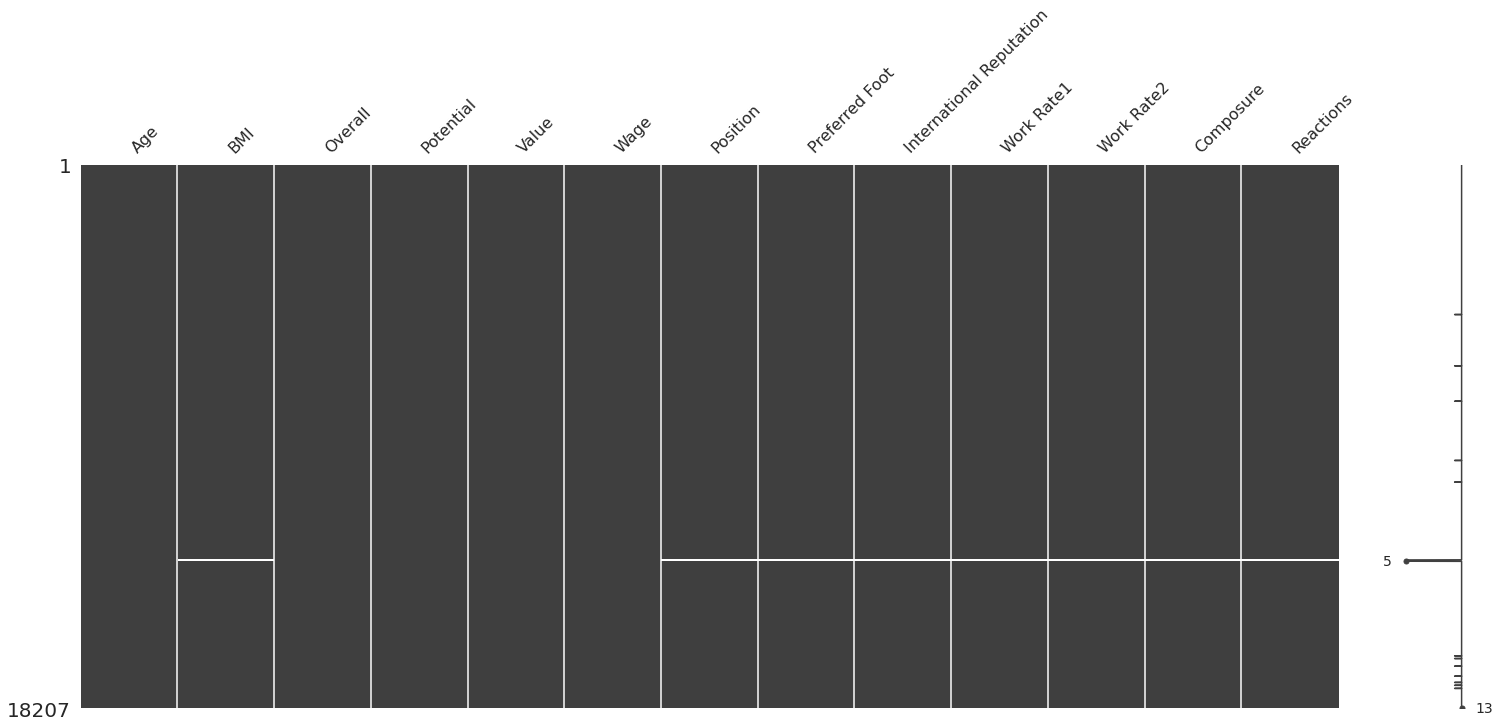

In [260]:
import missingno as msno
msno.matrix(df1)

## Prove di imputer che saranno utilizzati nelle pipeline

Suddividiamo le features in numeriche e categoriali:

In [261]:
player_num = player.select_dtypes(exclude=['object', 'category'])
player_cat = player.select_dtypes('object', 'category')

In [262]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

Eseguiamo l'addestramento dell'imputer per i campi numerici:

In [263]:
imputer_num.fit(player_num)
imputer_num.statistics_

array([2.50000000e+01, 2.28571429e+01, 6.60000000e+01, 7.10000000e+01,
       3.00000000e+03, 1.00000000e+00, 6.00000000e+01, 6.20000000e+01])

Eseguiamo adesso la trasformazione applicando l'imputer addestrato:

In [264]:
X = imputer_num.transform(player_num)
player_tr = pd.DataFrame(X, columns=player_num.columns,
                          index = list(player.index.values))

In [265]:
player_tr

,Age,BMI,Overall,Potential,Wage,International Reputation,Composure,Reactions
17472,19.0,22.530864,54.0,66.0,1000.0,1.0,42.0,47.0
5971,20.0,22.992624,69.0,80.0,13000.0,1.0,70.0,70.0
10264,30.0,22.205990,65.0,65.0,4000.0,1.0,52.0,59.0
176,24.0,25.469388,83.0,89.0,165000.0,3.0,72.0,70.0
3780,21.0,22.530864,72.0,83.0,3000.0,1.0,67.0,64.0
...,...,...,...,...,...,...,...,...
11284,24.0,25.617284,64.0,67.0,2000.0,1.0,65.0,61.0
11964,23.0,23.888441,64.0,72.0,1000.0,1.0,66.0,51.0
5390,21.0,25.082863,70.0,76.0,17000.0,1.0,65.0,66.0
860,30.0,24.074074,78.0,78.0,30000.0,2.0,71.0,77.0


Procediamo analogamente per i missing value delle features categoriali:

In [266]:
#player_cat = player.select_dtypes(include=['object'])
player_cat.head(10)

,Position,Preferred Foot,Work Rate1,Work Rate2
17472,CB,Right,Medium,Medium
5971,RCB,Right,Medium,High
10264,CB,Right,Medium,Medium
176,LCM,Right,High,High
3780,LM,Right,Medium,Medium
2358,ST,Right,High,Low
9656,RM,Right,High,High
2231,RM,Right,Medium,Medium
15178,RB,Right,Medium,Medium
14934,CB,Right,Medium,Medium


In [267]:
df1.isnull().sum()

Age                          0
BMI                         48
Overall                      0
Potential                    0
Value                        0
Wage                         0
Position                    60
Preferred Foot              48
International Reputation    48
Work Rate1                  48
Work Rate2                  48
Composure                   48
Reactions                   48
dtype: int64

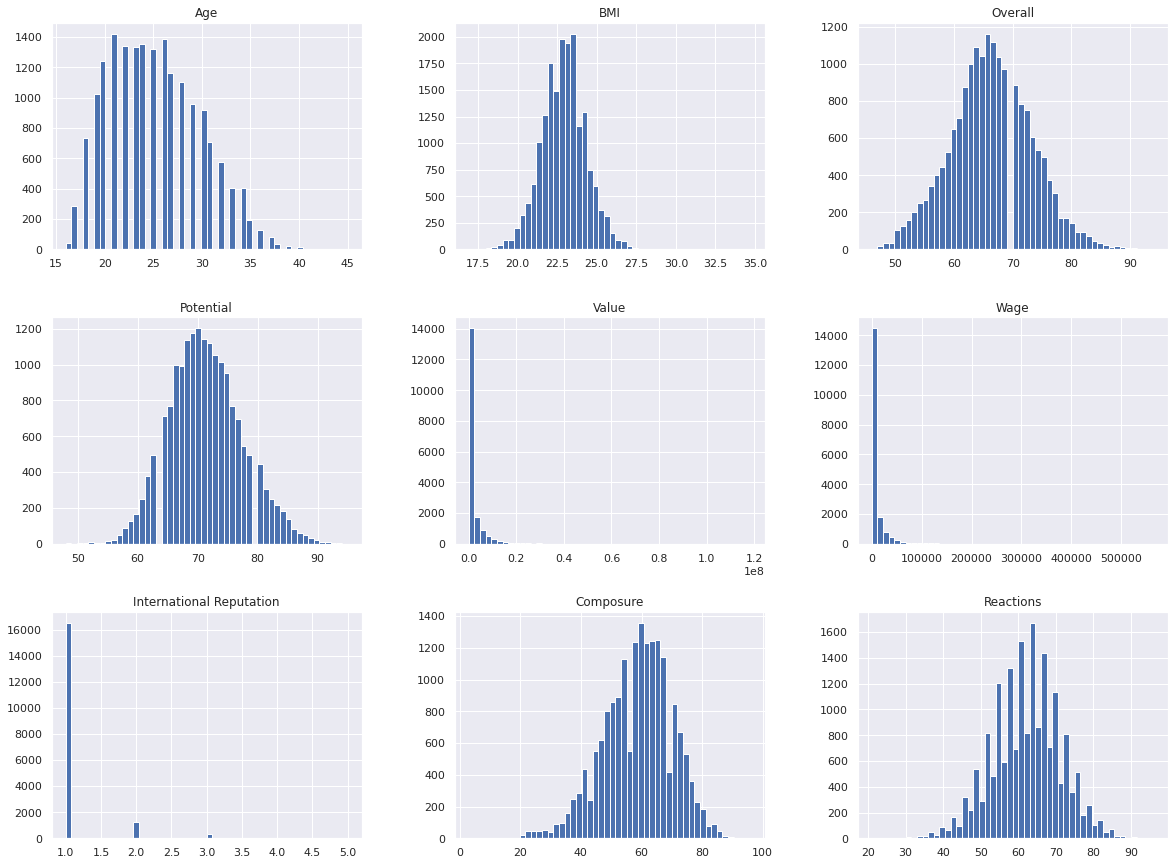

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt

df1.hist(bins=50, figsize=(20,15))
plt.show()



In [269]:
df1.isnull().sum()

Age                          0
BMI                         48
Overall                      0
Potential                    0
Value                        0
Wage                         0
Position                    60
Preferred Foot              48
International Reputation    48
Work Rate1                  48
Work Rate2                  48
Composure                   48
Reactions                   48
dtype: int64

## Pipeline

In [270]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer_num', SimpleImputer(strategy="median")),
       # ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])


player_num_tr = num_pipeline.fit_transform(player_num)


In [271]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20


try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20


In [384]:
num_attribs = player_num.columns
cat_attribs = player_cat.columns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
#cat_selector = DataFrameSelector(player_cat.columns)
ohe = OneHotEncoder(sparse=False)
cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy="most_frequent")),
   # ('selector', cat_selector),
    ('ohe', ohe)
])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
        ,("cat", cat_pipeline, cat_attribs)        
    ])

player_prepared = full_pipeline.fit_transform(player)

# 6 - Addestramento Modelli (DONE)

Come misura della performance dei modelli che andremo ad allenare scegliamo il RMSE. Il RMSE è una misura della capacità di predizione del modello. Ci dà un'idea dell'errore che commettiamo usando il modello per predire la variabile target.

Definiamo una funzione che calcola e scrive i principali indicatori di errore per i modelli calcolati per comodità. Noi faremo attenzione principalmente al RMSE.

In [273]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def print_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Mean Squared error : %s" % mean_squared_error(y_test, y_pred))
    print("Mean Absolute error : %s" % mean_absolute_error(y_test, y_pred))
    print("R2 Score: %s" % r2_score(y_test, y_pred))
    print("Root Mean Squared Error Score: %s" % np.sqrt(mean_squared_error(y_test, y_pred)))

    scores = cross_val_score(model, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("CrossValidation.Scores:", rmse_scores)
    print("CrossValidation.Mean: ", rmse_scores.mean())
    print("CrossValidation.Std.: ", rmse_scores.std())

## Linear Regression

In [274]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(player_prepared, player_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Abbiamo addestrato il modello di Regressione Lineare. Verifichiamone la bontà con gli score:

In [275]:
print_metrics(lin_reg, player_prepared, player_labels)


Mean Squared error : 6629295517967.157
Mean Absolute error : 1317432.7095130517
R2 Score: 0.7901641458610329
Root Mean Squared Error Score: 2574741.8352073976
CrossValidation.Scores: [2889579.66156624 2141438.34163352 2603979.97291382 2368293.57333879
 2559527.47162843 2389601.4380859  2937148.18313428 2813661.92990382
 2588813.42595361 2579009.02027775]
CrossValidation.Mean:  2587105.3018436157
CrossValidation.Std.:  234939.9518195164


## DecisionTree Regressor

In [276]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(player_prepared, player_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Misuriamo l'errore commesso con questo modello

In [277]:
print_metrics(tree_reg, player_prepared, player_labels)

Mean Squared error : 316683.8311019567
Mean Absolute error : 9.268795056642636
R2 Score: 0.9999999899760658
Root Mean Squared Error Score: 562.7466846654512
CrossValidation.Scores: [1089288.6721416   769126.00033583 1149982.54291307 1570543.58040606
 1510941.39817418 1279844.57895918 1862396.63866154 1686815.76100438
 1123917.89380074  945825.94981062]
CrossValidation.Mean:  1298868.3016207207
CrossValidation.Std.:  330026.6381182219


Questo modello è decisamente migliore rispetto al primo.

Eseguiamo il test di precisione dei modelli con la cross validation

In [278]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Std.: ", scores.std())

In [279]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, player_prepared, player_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print_scores(rmse_scores)

Scores: [1089288.6721416   769126.00033583 1149982.54291307 1570543.58040606
 1510941.39817418 1279844.57895918 1862396.63866154 1686815.76100438
 1123917.89380074  945825.94981062]
Mean:  1298868.3016207207
Std.:  330026.6381182219


In [280]:
lin_scores = cross_val_score(lin_reg, player_prepared, player_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print_scores(lin_rmse_scores)

Scores: [2889579.66156624 2141438.34163352 2603979.97291382 2368293.57333879
 2559527.47162843 2389601.4380859  2937148.18313428 2813661.92990382
 2588813.42595361 2579009.02027775]
Mean:  2587105.3018436157
Std.:  234939.9518195164


## Addestramento algoritmi e verifica del migliore osservando gli score

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
models = [LinearRegression(),SGDRegressor(), DecisionTreeRegressor(), LinearSVR(), AdaBoostRegressor(), 
          GradientBoostingRegressor(), RandomForestRegressor(), MLPRegressor()]

for model in models:
    print(f"Running model {type(model)}")
    model.fit(player_prepared,player_labels)
    print_metrics(model,player_prepared, player_labels)
    print("------------------------")

Running model <class 'sklearn.linear_model._base.LinearRegression'>
Mean Squared error : 6629295517967.157
Mean Absolute error : 1317432.7095130517
R2 Score: 0.7901641458610329
Root Mean Squared Error Score: 2574741.8352073976
CrossValidation.Scores: [2889579.66156624 2141438.34163352 2603979.97291382 2368293.57333879
 2559527.47162843 2389601.4380859  2937148.18313428 2813661.92990382
 2588813.42595361 2579009.02027775]
CrossValidation.Mean:  2587105.3018436157
CrossValidation.Std.:  234939.9518195164
------------------------
Running model <class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>
Mean Squared error : 6672540834546.829
Mean Absolute error : 1352277.4710914085
R2 Score: 0.78879530992403
Root Mean Squared Error Score: 2583126.1747245
CrossValidation.Scores: [2903592.95242493 2132743.65119162 2640071.381454   2385843.81260876
 2547995.57864323 2514426.83425631 3000267.87372621 2823566.99782141
 2527966.65657067 2566821.24962409]
CrossValidation.Mean:  2604329.69883

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Mean Squared error : 36106567730089.805
Mean Absolute error : 2318975.735275979
R2 Score: -0.14287445161188828
Root Mean Squared Error Score: 6008874.081730271


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

CrossValidation.Scores: [7080771.8665142  4985985.75360482 5807843.9415763  6105044.17794454
 6364228.10915023 5464017.15534104 6623982.68936681 5616937.16190352
 6319637.49026826 5687226.95376816]
CrossValidation.Mean:  6005567.529943789
CrossValidation.Std.:  583092.3888211169
------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Il migliore sembra essere il DecisionTreeRegressor con Root Mean Squared Error Score: 562.7466846654512


# 7 - Fine Tune the model (DONE)

## GridSearch

Utilizzando la libreria GridSearch proviamo le varie combinazioni dei parametri riportati in param_grid. L'algoritmo selezionerà la migliore combinazione dopo averle provate tutte. L'algoritmo è time consuming (impiega molto tempo) all'aumentare dei parametri e delle combinazioni da testare.

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
              #"criterion": ["mse", "mae"],
              "min_samples_split": [2,10, 20, 40],
              "max_depth": [2, 6, 8],
              #"min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.
tree_reg_grid = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree_reg_grid, param_grid, cv=5)

grid_search.fit(player_prepared, player_labels)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_split': [2, 10, 20, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_

Visualizziamo i migliori hyperparam individuati

In [283]:
grid_search.best_params_

{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_split': 2}

E' possibile anche adoperare direttamente il modello migliore addestrato:

In [284]:
grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [285]:
print_metrics(grid_search.best_estimator_, player_prepared, player_labels)

Mean Squared error : 441025062578.2771
Mean Absolute error : 316377.82414518145
R2 Score: 0.9860403159804857
Root Mean Squared Error Score: 664097.1785652136
CrossValidation.Scores: [1177137.70289847  754342.09151814 1217214.0433214  1615635.66677411
 1648267.58589753  776305.46551614 2101968.00548931 1700258.58107633
 1121652.66756396 1028892.96723973]
CrossValidation.Mean:  1314167.477729512
CrossValidation.Std.:  414912.3517367089


Nel caso specifico, adoperando come parametro di valutazione della performance il RMSE resta migliore il modello ottenuto con gli hyperparam di default.

In [286]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 2}
nan {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 10}
nan {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 20}
nan {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 40}
nan {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_split': 2}
nan {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_split': 10}
nan {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_split': 20}
nan {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_split': 40}
nan {'max_depth': 2, 'max_leaf_nodes': 100, 'min_samples_split': 2}
nan {'max_depth': 2, 'max_leaf_nodes': 100, 'min_samples_split': 10}
nan {'max_depth': 2, 'max_leaf_nodes': 100, 'min_samples_split': 20}
nan {'max_depth': 2, 'max_leaf_nodes': 100, 'min_samples_split': 40}
nan {'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_split': 2}
nan {'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_split': 10}
nan {'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in sqrt



In [287]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021227,0.003602,0.001518,0.000210,2,5,2,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.833289,0.808683,0.813335,0.7876,0.840754,0.816732,0.018848,25
1,0.016815,0.000178,0.001361,0.000025,2,5,10,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.833289,0.808683,0.813335,0.7876,0.840754,0.816732,0.018848,25
2,0.017071,0.000255,0.001399,0.000031,2,5,20,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.833289,0.808683,0.813335,0.7876,0.840754,0.816732,0.018848,25
3,0.018006,0.001551,0.001894,0.000767,2,5,40,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.833289,0.808683,0.813335,0.7876,0.840754,0.816732,0.018848,25
4,0.016925,0.000165,0.001366,0.000023,2,20,2,"{'max_depth': 2, 'max_leaf_nodes': 20, 'min_sa...",0.833289,0.808683,0.813335,0.7876,0.840754,0.816732,0.018848,25


## Randomized Search

Utilizzando la libreria RandomizedSearchCV segnaliamo in quali range deve selezionare i valori da verificare. L'algoritmo selezionerà la migliore combinazione dopo averle provate tutte.

In [288]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
param_distribs = {
        'min_samples_split': randint(low=1, high=10),
        'max_depth': randint(low=1, high=8),
    }

tree_reg_random = DecisionTreeRegressor(random_state=42)
rnd_search = RandomizedSearchCV(tree_reg_random, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(player_prepared, player_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=42,
                                                   splitter='best'),
                   iid='dep

In [289]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1379291.5403790502 {'max_depth': 7, 'min_samples_split': 4}
1508725.340188267 {'max_depth': 5, 'min_samples_split': 8}
1505899.3754983519 {'max_depth': 5, 'min_samples_split': 5}
1340130.7701276615 {'max_depth': 7, 'min_samples_split': 3}
1355154.4724867484 {'max_depth': 7, 'min_samples_split': 8}
1532092.4420971249 {'max_depth': 5, 'min_samples_split': 4}
1899161.3941625813 {'max_depth': 3, 'min_samples_split': 6}
1532092.4420971249 {'max_depth': 5, 'min_samples_split': 2}
1710358.0969420674 {'max_depth': 4, 'min_samples_split': 6}
2406583.662331239 {'max_depth': 2, 'min_samples_split': 5}


In [290]:
print_metrics(rnd_search.best_estimator_, player_prepared, player_labels)

Mean Squared error : 541226734062.7072
Mean Absolute error : 310814.3415037647
R2 Score: 0.9828686511685759
Root Mean Squared Error Score: 735681.1361335203
CrossValidation.Scores: [1340348.94569126  822167.45326806 1134751.548815   1400040.74198494
 1574594.76140969 1321425.19920094 1776823.68643425 1822911.23524539
 1245972.62247611  985002.15182407]
CrossValidation.Mean:  1342403.8346349723
CrossValidation.Std.:  304645.2429984404


Anche in tal caso il miglior modello resta il DecisionTree ottenuto con i parametri di default.

## Evaluate Model on the Test Set

In [291]:
final_model = tree_reg

X_test = test_set.drop("Value", axis=1)
y_test = test_set["Value"].copy()

X_test_prepared = full_pipeline.transform(X_test) #!!!!!!!!! do not call fit or fit_transform!
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [292]:
final_rmse

1488461.9153873182

# 8 - Ensemble Learning (DONE)

Alcuni algoritmi di ensemble, implementati dalle librerie scikitlearn, sono già stati provati al punto 6. Proviamo qui ad adoperarli considerandone le modalità implementative.

## Stacking Regression

Eseguiamo nuovamente l'addestramento su alcuni algoritmi di regressione e ne confrontiamo le performance:

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = LinearSVR()  
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores



>knn -631928.835 (57891.593)
>cart -242170.594 (36782.651)
>svm -2392947.386 (180279.983)


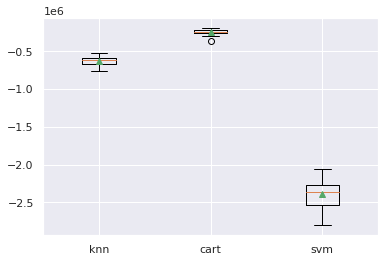

In [294]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, player_prepared, player_labels)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Il modello che performa meglio, valutando la performance con la crossvalidation, è ancora il DecisioneTree.

Definiamo adesso lo stacking con i modelli da adoperare per l'ensemble

In [295]:
from sklearn.ensemble import StackingRegressor
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', LinearSVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

Ridefiniamo nuovamente i modelli da valutare aggiungendo anche lo staching appena definito:

In [296]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = LinearSVR()
	models['stacking'] = get_stacking()
	return models

>knn -631928.835 (57891.593)
>cart -241356.971 (34925.353)
>svm -2392946.616 (180282.508)
>stacking -301442.906 (40047.598)


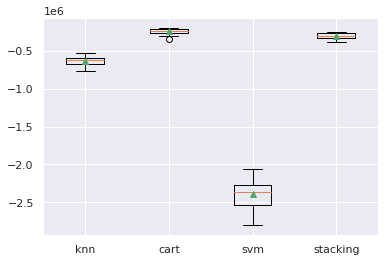

In [297]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, player_prepared, player_labels)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Questo ensemble stacking non migliora la performance rispetto al DecisionTree semplice. E' il caso di orchestrare meglio i weak learner per migliorare la prestazione.

In [298]:
# define the base models
level0 = list()
level0.append(('cart', DecisionTreeRegressor()))
# define meta learner model
level1 = DecisionTreeRegressor()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
scores = evaluate_model(model, player_prepared, player_labels)
names.append(name)
print('>%s %.3f (%.3f)' % ('stacking', mean(scores), std(scores)))

>stacking -284266.124 (41460.552)


## Bagging Regressor - Random Forest

Proviamo ad adoperare la tecnica ensemble bagging (short for bootstrap aggregating, sampling with replacement).
Adoperando come weak learner un DecisionTree stiamo realizzando nuovamente un addestramento di modello RandomForest implementandolo come ensemble e non con il suo algoritmo specifico messo a disposizione dalle librerie scikitlearn.

In [299]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg = BaggingRegressor(
    DecisionTreeRegressor(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_reg.fit(player_prepared, player_labels)
print_metrics(bag_reg, player_prepared, player_labels)

Mean Squared error : 5938566318425.526
Mean Absolute error : 513529.5805012015
R2 Score: 0.8120276683381524
Root Mean Squared Error Score: 2436917.380303552
CrossValidation.Scores: [3343199.99306956 1373054.89235504 2254027.37373259 2413857.01918362
 2703389.52773237 1934615.98290652 2964699.77793888 2213283.12367522
 2657632.87628627 2062657.06432402]
CrossValidation.Mean:  2392041.76312041
CrossValidation.Std.:  529873.630737231


Il modello ottenuto non migliora quello ottenuto con il DecisionTree, come avevamo già visto al punto 6.

## Pasting Regressor

In [300]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg = BaggingRegressor(
    DecisionTreeRegressor(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=False, random_state=42)
bag_reg.fit(player_prepared, player_labels)
print_metrics(bag_reg, player_prepared, player_labels)

Mean Squared error : 5867397355800.961
Mean Absolute error : 511696.7868177137
R2 Score: 0.8142803662334319
Root Mean Squared Error Score: 2422271.115255466
CrossValidation.Scores: [3345312.04713134 1372646.64027578 2257791.79368546 2408178.02825145
 2699234.48320127 1926629.51623777 2962238.79826934 2222279.01787884
 2659141.54992496 2059338.26420914]
CrossValidation.Mean:  2391279.0139065357
CrossValidation.Std.:  530388.7400786484


## Feature importance with Random Forest


In [301]:
rnd_reg = RandomForestRegressor(n_estimators=500, random_state=42)
rnd_reg.fit(player_prepared, player_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [302]:
for name, score in zip(train_set.columns, rnd_reg.feature_importances_):
    print(name, score)

Age 0.02743388510568578
BMI 0.00292382936041117
Overall 0.8568699933970982
Potential 0.07782541346559156
Value 0.010829066488839623
Wage 0.0005923869710201472
Position 0.006667980474837436
Preferred Foot 0.00890192862664592
International Reputation 0.00023237279798853528
Work Rate1 0.00018859653985117038
Work Rate2 0.00016696682344824912
Composure 1.313655944993762e-05
Reactions 9.58808442632363e-05


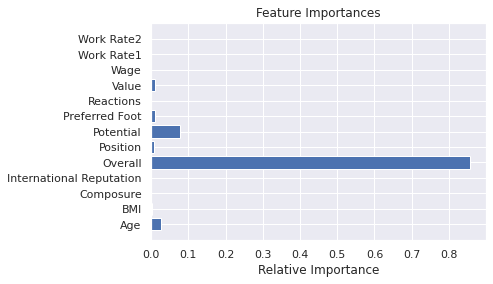

In [303]:
features = train_set.columns
importances = rnd_reg.feature_importances_
indices = np.argsort(features)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Curiosità: proviamo a rilanciarlo con tutte le variabili

In [304]:
df2 = dfGiocatoriFifa20
df2=df2.drop('Unnamed: 0,Name,Photo,Nationality,Flag,Club,Club Logo,Jersey Number,Joined,Real Face,Loaned From,Release Clause'.split(','), axis=1)
#df1.head()

train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)
train_set.columns


Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Height_cm',
       'Weight_kg', 'BMI', 'Work Rate1', 'Work

In [305]:
playerX = train_set.drop("Value", axis=1) # drop labels for training set
playery = train_set["Value"].copy()

player_prepared = full_pipeline.fit_transform(playerX)

rnd_reg = RandomForestRegressor(n_estimators=500, random_state=42)
rnd_reg.fit(player_prepared, playery)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

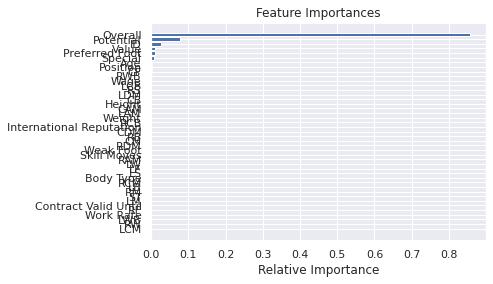

In [308]:
features = train_set.columns
importances = rnd_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 9 - Conclusioni (DONE)

## And the winner is

In [309]:
final_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Il presente studio è stato realizzato per fini didattici. L'analisi condotta ci ha permesso di toccare con mano vari aspetti visti durante il corso, sia per la parte teorica che pratica.
La necessità di supportare la decisione di un manager sportivo è stata affrontata adoperando ed allenando i numerosi modelli di regressione disponibili in scikitlearn.
Dopo una prima fase di acquisizione conoscenze del dominio, che ha richiesto molto tempo trattandosi di argomento conosciuto si, ma in modo superficiale, abbiamo iniziato a prendere le prime decisioni ed aformalizzare il problema e le tecniche da adoperare.
La parte che ha richiesto più tempo è stata l'esplorazione e comprensione dei dati disponibili. La scelta di quali variabili adoperare per predire la nostra variabile target e la visualizzazione di alcuni dati mediante le numerose librerie a disposizione.
Probabilmente in questa fase abbiamo commesso un errore di 'data snooping' (ci siamo permessi di ignorarlo per questioni didattiche) non lavorando immediatamente sul solo training set, ma decidendo di scorporarlo più avanti del dovuto nell'analisi.
La realizzazione delle pipeline è stata fondamentale per le ripetute sessioni di check che abbiamo eseguito sui dati; le modifiche e re-check ripetuti sarebbero costate molto più tempo e attenzione altrimenti.
Il modello che meglio ha performato, adoperando il RMSE come indice di bontà, è il DecisionTreeRegressor con hyperparameters di default.